## This notebook will have
- Build a model
- Train a model
- Run a model


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 1. Data Preparing and loading
Use Linerar Regression to make a straight line using known parameters.

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
print("The value of x",X)
print("The value of y",y)
print("The length of X",len(X))
print("The length of y",len(y))

The value of x tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
The value of y tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420

In [ ]:
# Creating training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_skl, X_test_skl, y_train_skl, y_test_skl = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Create a function to visualize your data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  "plots training data, test data and compares predictions"
  plt.figure(figsize=(10, 7))

  #plot the data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legedn : show the labels in the graph
  plt.legend(prop={"size": 14})

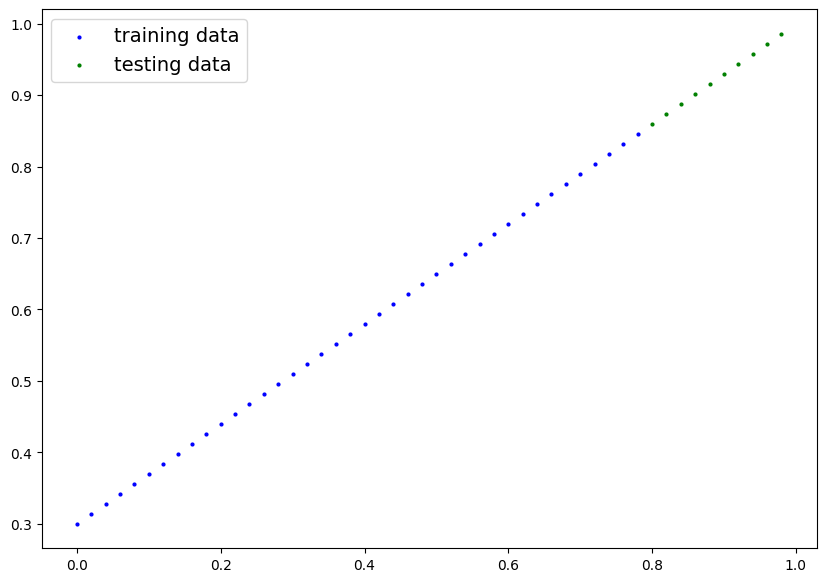

In [ ]:
plot_predictions()

## 2. Build a Model

In [ ]:
from torch import nn
random_seed = 42
torch.manual_seed(random_seed)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Create you own forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


## Update the weight and bias based on training data, adjust the values to better represent ideal values

By using 2 algorithms:
1. Gradient Descent
2. Backward propagation

In [ ]:
h = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                          dtype=torch.float))
print("self.weights ----",h)

self.weights ---- Parameter containing:
tensor([0.3367], requires_grad=True)


In [ ]:
model_0 = LinearRegressionModel()
#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [ ]:
weight, bias

(0.7, 0.3)

###### NOTE: The whole point of Deep Learning is to set the value of [('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]) to be closer to value of weight, bias i.e : (0.7, 0.3)

We start with a random value and make the prediction near to what we defined.


## Prediction
Making prediction using inference_mode()
Check how good our model predicts y_test based on x_test.
When we pass data through our model, it is gonna run it through the forward() method.


In [ ]:
model_0.eval()
with torch.inference_mode(): # inference removes gradient tracking.
  y_preds = model_0(X_test)

y_preds

tensor([[0.3375],
        [0.3401],
        [0.3427],
        [0.3452],
        [0.3478],
        [0.3504],
        [0.3530],
        [0.3555],
        [0.3581],
        [0.3607]])

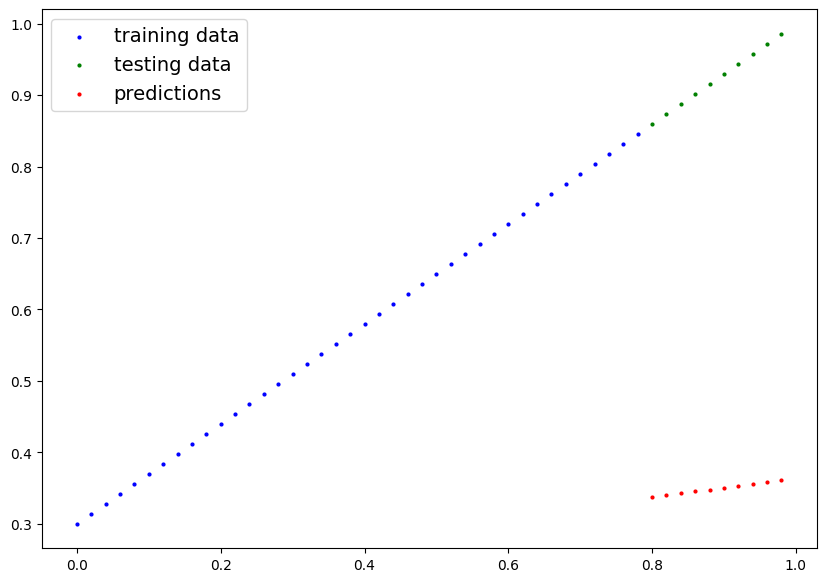

In [ ]:
plot_predictions(predictions=y_preds)

## Training
Moving a data from unknown data towards known data.

To measure how poor a model is doing: you use a loss functions.

*Note: Loss function might be called cost function or  criterion.*

Thinks we need to train.
1. Loss Function
2. Optimize - Takes into account the loss of a model and adjust's the parameters. (eg weights and bias)

For Pytorch we need
  - A trainig loop
  - A testing loop

## Setting up a loss function and optimizer

In [ ]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
# Stochastic(Random) gradient descant
# starts wokring in a direction randomly and if it finds a place where the error satrts to minimize,
# it follows that path.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop

0. Looop through data
1. Forward pass/ Forward Propagation, make prediction on data
2. Calulate the loss (compaare forward pass pred to ground truth i.e weight and bias)
3. Optmizier zero grad
4. Backward propagation
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (Gradient descent)

What is gradient? its a slope on hill.
The bottom of the hill is "Convergence"


In [ ]:
# Epoch: 1 loop through the data... (Hyperparameter, because we have set them ourselves)

epochs = 100

# 0. Loop thorough the data
for epoch in range(epochs):
  # set the model to training model ; all gradient turns true
  model_0.train()

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(f"Loss: {loss}")

  #3. Optmizer zero grad
  optimizer.zero_grad()

  #4. Backward propagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval() # trains off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
   print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
   print(model_0.state_dict())

Epoch: 0 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 10 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 20 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 30 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 40 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 50 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias', tensor([0.3060]))])
Epoch: 60 | Loss: 0.007015087641775608 | Test Loss: 0.002636212157085538
OrderedDict([('weights', tensor([0.6963])), ('bias',

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6924])), ('bias', tensor([0.2960]))])

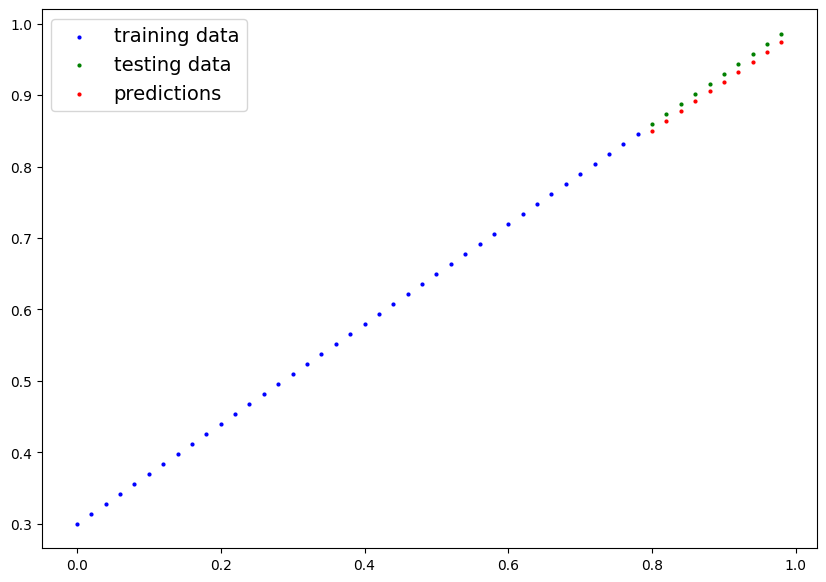

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)